In [1]:
import numpy as np
from keras.datasets import cifar10

# load the cifar 10 dataset, select 2 classes and convert to binary format.
# the first class (specified by class_indices[0]) is assigned the label 0, and the second class is assigned the label 1.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

class_indices = [0, 1]

train_mask = np.isin(y_train, class_indices).squeeze()
x_train_binary = x_train[train_mask]
y_train_binary = y_train[train_mask]

test_mask = np.isin(y_test, class_indices).squeeze()
x_test_binary = x_test[test_mask]
y_test_binary = y_test[test_mask]

y_train_binary = np.where(y_train_binary == class_indices[0], 0, 1)
y_test_binary = np.where(y_test_binary == class_indices[0], 0, 1)

x_train_binary = x_train_binary.astype('float32') / 255.0
x_test_binary = x_test_binary.astype('float32') / 255.0

print("Shapes after filtering:")
print("Training set:", x_train_binary.shape, y_train_binary.shape)
print("Test set:", x_test_binary.shape, y_test_binary.shape)


Shapes after filtering:
Training set: (10000, 32, 32, 3) (10000, 1)
Test set: (2000, 32, 32, 3) (2000, 1)


In [2]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

training_subset_size = 10000
test_subset_size = 2000

x_train_subset = x_train_binary[:training_subset_size]
y_train_subset = y_train_binary[:training_subset_size]

x_test_subset = x_test_binary[:test_subset_size]
y_test_subset = y_test_binary[:test_subset_size]

x_train_flattened = x_train_subset.reshape(x_train_subset.shape[0], -1)
x_test_flattened = x_test_subset.reshape(x_test_subset.shape[0], -1)

linear_model = SVC(kernel='linear',  C=2.0)

start_time = time.time()

linear_model.fit(x_train_flattened, np.ravel(y_train_subset))

training_time = time.time() - start_time
print("Training Time: {:.2f} seconds".format(training_time))

print("SVM Parameters:")
print("Kernel Type: {}".format(linear_model.kernel))
print("Regularization Parameter (C): {}".format(linear_model.C))

y_pred_train = linear_model.predict(x_train_flattened)

y_pred_test = linear_model.predict(x_test_flattened)

accuracy_train = accuracy_score(y_train_subset, y_pred_train)
print("Training Accuracy: {:.2%}".format(accuracy_train))

accuracy_test = accuracy_score(y_test_subset, y_pred_test)
print("Testing Accuracy: {:.2%}".format(accuracy_test))

correct_examples_train = []
incorrect_examples_train = []

for i in range(len(y_train_subset)):
    true_label = y_train_subset[i]
    predicted_label = y_pred_train[i]
    input_data = x_train_subset[i]

    if true_label == predicted_label:
        correct_examples_train.append((input_data, true_label, predicted_label))
    else:
        incorrect_examples_train.append((input_data, true_label, predicted_label))

correct_examples_test = []
incorrect_examples_test = []

for i in range(len(y_test_subset)):
    true_label = y_test_subset[i]
    predicted_label = y_pred_test[i]
    input_data = x_test_subset[i]

    if true_label == predicted_label:
        correct_examples_test.append((input_data, true_label, predicted_label))
    else:
        incorrect_examples_test.append((input_data, true_label, predicted_label))

# Print examples for training set
print("\nExamples of Correct Classifications on Training Set:")
for example in correct_examples_train[:min(3, len(correct_examples_train))]:
    print(f"Input: {example[0]}, True Label: {example[1]}, Predicted Label: {example[2]}")

print("\nExamples of Incorrect Classifications on Training Set:")
for example in incorrect_examples_train[:min(3, len(incorrect_examples_train))]:
    print(f"Input: {example[0]}, True Label: {example[1]}, Predicted Label: {example[2]}")

# Print examples for testing set
print("\nExamples of Correct Classifications on Testing Set:")
for example in correct_examples_test[:min(3, len(correct_examples_test))]:
    print(f"Input: {example[0]}, True Label: {example[1]}, Predicted Label: {example[2]}")

print("\nExamples of Incorrect Classifications on Testing Set:")
for example in incorrect_examples_test[:min(3, len(incorrect_examples_test))]:
    print(f"Input: {example[0]}, True Label: {example[1]}, Predicted Label: {example[2]}")


Training Time: 466.16 seconds
SVM Parameters:
Kernel Type: linear
Regularization Parameter (C): 2.0
Training Accuracy: 89.93%
Testing Accuracy: 79.65%

Examples of Correct Classifications on Training Set:
Input: [[[0.6666667  0.7058824  0.7764706 ]
  [0.65882355 0.69803923 0.76862746]
  [0.69411767 0.7254902  0.79607844]
  ...
  [0.63529414 0.7019608  0.84313726]
  [0.61960787 0.69803923 0.8392157 ]
  [0.6156863  0.69411767 0.83137256]]

 [[0.65882355 0.70980394 0.7764706 ]
  [0.6745098  0.7254902  0.7882353 ]
  [0.67058825 0.7176471  0.78431374]
  ...
  [0.62352943 0.69411767 0.83137256]
  [0.6117647  0.6901961  0.827451  ]
  [0.6039216  0.68235296 0.81960785]]

 [[0.6039216  0.6666667  0.7294118 ]
  [0.58431375 0.64705884 0.70980394]
  [0.5058824  0.5647059  0.63529414]
  ...
  [0.6313726  0.69803923 0.8392157 ]
  [0.6156863  0.69411767 0.83137256]
  [0.6039216  0.68235296 0.81960785]]

 ...

 [[0.2901961  0.32941177 0.3137255 ]
  [0.29803923 0.33333334 0.31764707]
  [0.30588236 0.33

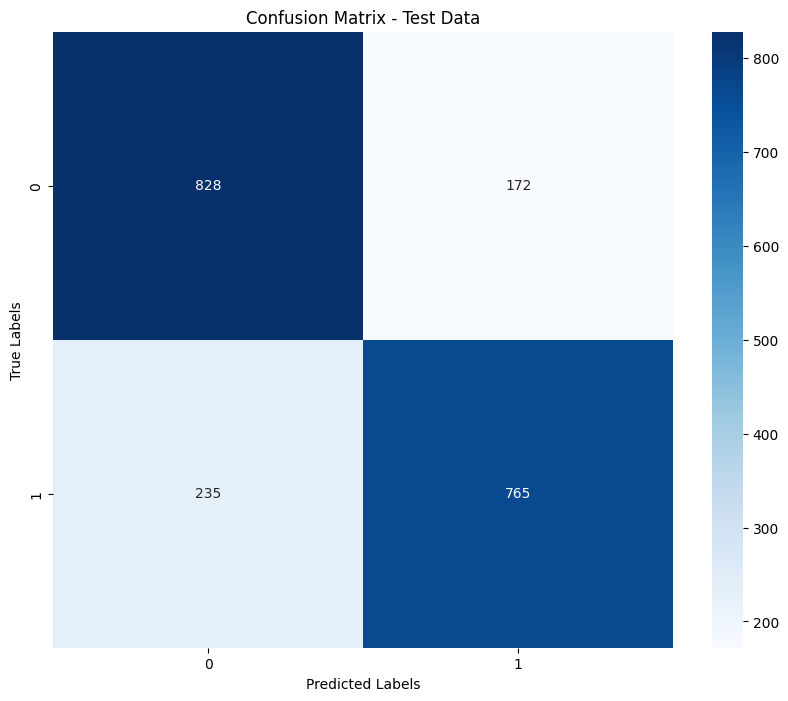

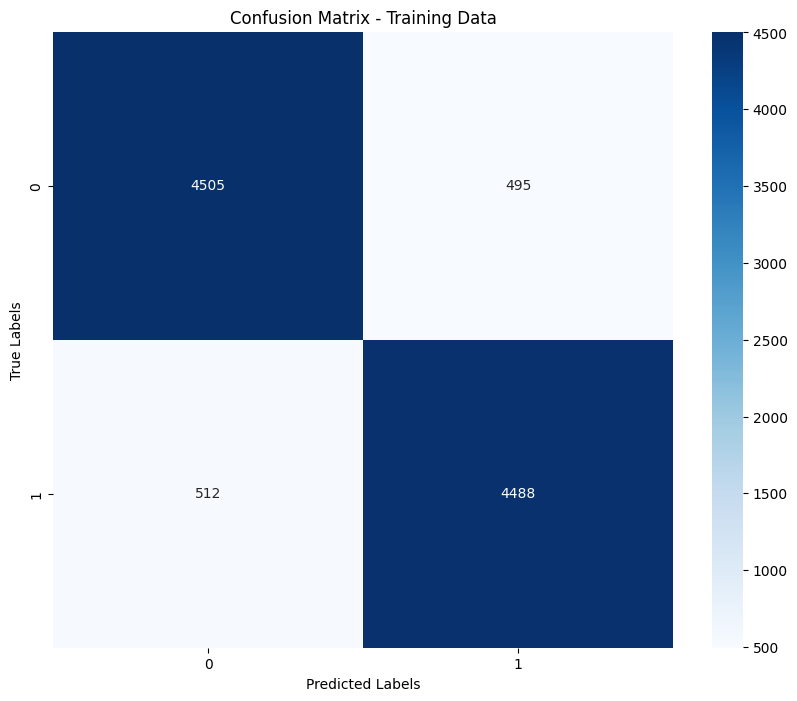

Unique labels in Y_train_subset: [0 1]
Unique labels in y_pred_train: [0 1]
Unique labels in Y_test_subset: [0 1]
Unique labels in y_pred_test: [0 1]


In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cm_test = confusion_matrix(y_test_subset, y_pred_test)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

cm_train = confusion_matrix(y_train_subset, y_pred_train)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("Unique labels in Y_train_subset:", np.unique(y_train_subset))
print("Unique labels in y_pred_train:", np.unique(y_pred_train))

print("Unique labels in Y_test_subset:", np.unique(y_test_subset))
print("Unique labels in y_pred_test:", np.unique(y_pred_test))

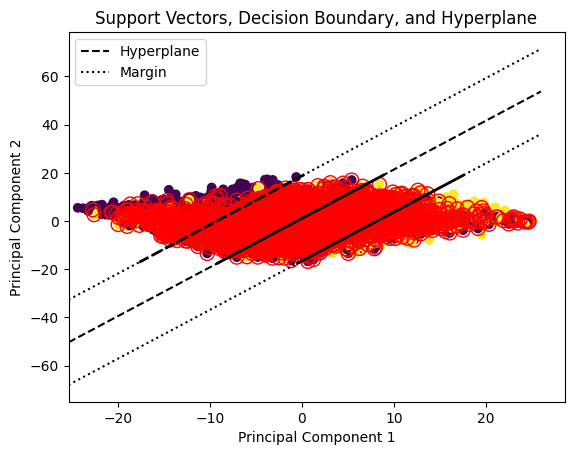

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

if x_train_flattened.shape[1] > 2:
    # apply PCA to reduce the data to 2D
    pca = PCA(n_components=2)
    x_train_pca = pca.fit_transform(x_train_flattened)

    # fit the SVM model on the reduced data
    linear_model.fit(x_train_pca, np.ravel(y_train_subset))

    # Plot the original data points in the reduced space
    plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train_subset, cmap='viridis')

    # Plot decision boundary
    h = .02
    x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
    y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = linear_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linewidths=2, colors='black')

    # Highlight support vectors
    plt.scatter(linear_model.support_vectors_[:, 0], linear_model.support_vectors_[:, 1], facecolors='none', edgecolors='r', s=100)

    # Plot the hyperplane
    w = linear_model.coef_[0]
    a = -w[0] / w[1]
    xx_hyperplane = np.linspace(x_min, x_max)
    yy_hyperplane = a * xx_hyperplane - (linear_model.intercept_[0]) / w[1]
    plt.plot(xx_hyperplane, yy_hyperplane, 'k--', label='Hyperplane')

    # Plot margins
    yy_margin1 = a * xx_hyperplane - (linear_model.intercept_[0] - 1) / w[1]
    yy_margin2 = a * xx_hyperplane - (linear_model.intercept_[0] + 1) / w[1]
    plt.plot(xx_hyperplane, yy_margin1, 'k:', label='Margin')
    plt.plot(xx_hyperplane, yy_margin2, 'k:')

    plt.title('Support Vectors, Decision Boundary, and Hyperplane')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()
else:
    print("Visualization only supported for datasets with more than two features.")


In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

training_subset_size = 10000
test_subset_size = 2000

x_train_subset = x_train_binary[:training_subset_size]
y_train_subset = y_train_binary[:training_subset_size]

x_test_subset = x_test_binary[:test_subset_size]
y_test_subset = y_test_binary[:test_subset_size]

x_train_flattened = x_train_subset.reshape(x_train_subset.shape[0], -1)
x_test_flattened = x_test_subset.reshape(x_test_subset.shape[0], -1)

poly_model = SVC(kernel='poly',  C=1.0, degree = 2)

start_time = time.time()

poly_model.fit(x_train_flattened, np.ravel(y_train_subset))

training_time = time.time() - start_time
print("Training Time: {:.2f} seconds".format(training_time))

print("SVM Parameters:")
print("Kernel Type: {}".format(poly_model.kernel))
print("Regularization Parameter (C): {}".format(poly_model.C))

y_pred_train = poly_model.predict(x_train_flattened)

y_pred_test = poly_model.predict(x_test_flattened)

accuracy_train = accuracy_score(y_train_subset, y_pred_train)
print("Training Accuracy: {:.2%}".format(accuracy_train))

accuracy_test = accuracy_score(y_test_subset, y_pred_test)
print("Testing Accuracy: {:.2%}".format(accuracy_test))

correct_examples_train = []
incorrect_examples_train = []

for i in range(len(y_train_subset)):
    true_label = y_train_subset[i]
    predicted_label = y_pred_train[i]
    input_data = x_train_subset[i]

    if true_label == predicted_label:
        correct_examples_train.append((input_data, true_label, predicted_label))
    else:
        incorrect_examples_train.append((input_data, true_label, predicted_label))

correct_examples_test = []
incorrect_examples_test = []

for i in range(len(y_test_subset)):
    true_label = y_test_subset[i]
    predicted_label = y_pred_test[i]
    input_data = x_test_subset[i]

    if true_label == predicted_label:
        correct_examples_test.append((input_data, true_label, predicted_label))
    else:
        incorrect_examples_test.append((input_data, true_label, predicted_label))

# Print examples for training set
print("\nExamples of Correct Classifications on Training Set:")
for example in correct_examples_train[:min(3, len(correct_examples_train))]:
    print(f"Input: {example[0]}, True Label: {example[1]}, Predicted Label: {example[2]}")

print("\nExamples of Incorrect Classifications on Training Set:")
for example in incorrect_examples_train[:min(3, len(incorrect_examples_train))]:
    print(f"Input: {example[0]}, True Label: {example[1]}, Predicted Label: {example[2]}")

# Print examples for testing set
print("\nExamples of Correct Classifications on Testing Set:")
for example in correct_examples_test[:min(3, len(correct_examples_test))]:
    print(f"Input: {example[0]}, True Label: {example[1]}, Predicted Label: {example[2]}")

print("\nExamples of Incorrect Classifications on Testing Set:")
for example in incorrect_examples_test[:min(3, len(incorrect_examples_test))]:
    print(f"Input: {example[0]}, True Label: {example[1]}, Predicted Label: {example[2]}")


Training Time: 118.14 seconds
SVM Parameters:
Kernel Type: poly
Regularization Parameter (C): 1.0
Training Accuracy: 93.52%
Testing Accuracy: 90.15%

Examples of Correct Classifications on Training Set:
Input: [[[0.6666667  0.7058824  0.7764706 ]
  [0.65882355 0.69803923 0.76862746]
  [0.69411767 0.7254902  0.79607844]
  ...
  [0.63529414 0.7019608  0.84313726]
  [0.61960787 0.69803923 0.8392157 ]
  [0.6156863  0.69411767 0.83137256]]

 [[0.65882355 0.70980394 0.7764706 ]
  [0.6745098  0.7254902  0.7882353 ]
  [0.67058825 0.7176471  0.78431374]
  ...
  [0.62352943 0.69411767 0.83137256]
  [0.6117647  0.6901961  0.827451  ]
  [0.6039216  0.68235296 0.81960785]]

 [[0.6039216  0.6666667  0.7294118 ]
  [0.58431375 0.64705884 0.70980394]
  [0.5058824  0.5647059  0.63529414]
  ...
  [0.6313726  0.69803923 0.8392157 ]
  [0.6156863  0.69411767 0.83137256]
  [0.6039216  0.68235296 0.81960785]]

 ...

 [[0.2901961  0.32941177 0.3137255 ]
  [0.29803923 0.33333334 0.31764707]
  [0.30588236 0.3333

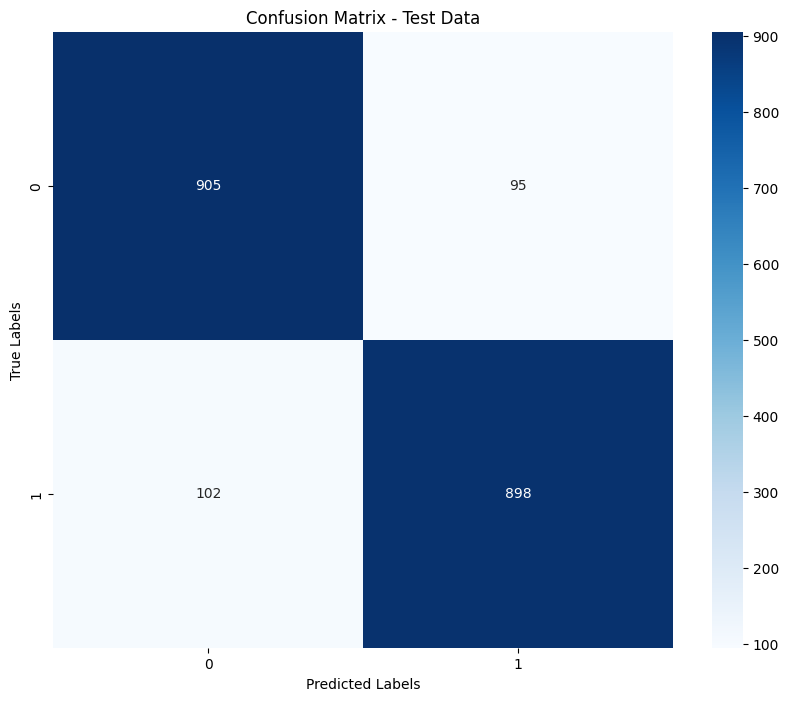

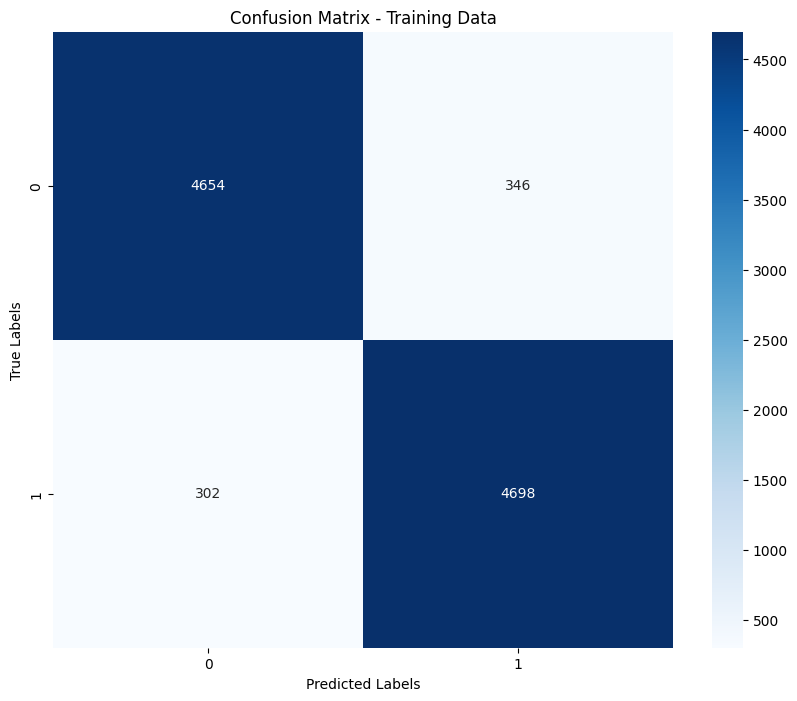

Unique labels in Y_train_subset: [0 1]
Unique labels in y_pred_train: [0 1]
Unique labels in Y_test_subset: [0 1]
Unique labels in y_pred_test: [0 1]


In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cm_test = confusion_matrix(y_test_subset, y_pred_test)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

cm_train = confusion_matrix(y_train_subset, y_pred_train)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("Unique labels in Y_train_subset:", np.unique(y_train_subset))
print("Unique labels in y_pred_train:", np.unique(y_pred_train))

print("Unique labels in Y_test_subset:", np.unique(y_test_subset))
print("Unique labels in y_pred_test:", np.unique(y_pred_test))

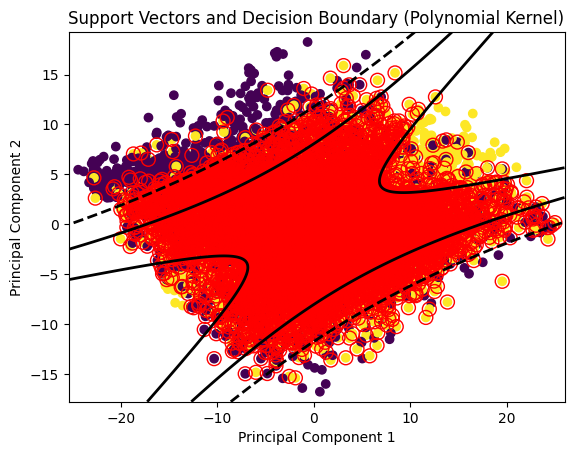

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# assuming x_train_flattened has more than two features
if x_train_flattened.shape[1] > 2:
    # apply PCA to reduce the data to 2D
    pca = PCA(n_components=2)
    x_train_pca = pca.fit_transform(x_train_flattened)

    poly_model.fit(x_train_pca, np.ravel(y_train_subset))
    # Plot the original data points in the reduced space
    plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train_subset, cmap='viridis')

    # Plot decision boundary
    h = .02
    x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
    y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Calculate decision function values for each point in the mesh
    Z = poly_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linewidths=2, colors='black')

    # Highlight support vectors
    plt.scatter(poly_model.support_vectors_[:, 0], poly_model.support_vectors_[:, 1], facecolors='none', edgecolors='r', s=100)

    plt.title('Support Vectors and Decision Boundary (Polynomial Kernel)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()
else:
    print("Visualization only supported for datasets with more than two features.")


In [8]:
# code for guassian kernel

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, confusion_matrix
from keras.datasets import cifar10
import time

training_subset_size = 10000
test_subset_size = 2000

x_train_subset = x_train_binary[:training_subset_size]
y_train_subset = y_train_binary[:training_subset_size]

x_test_subset = x_test_binary[:test_subset_size]
y_test_subset = y_test_binary[:test_subset_size]

x_train_flattened = x_train_subset.reshape(x_train_subset.shape[0], -1)
x_test_flattened = x_test_subset.reshape(x_test_subset.shape[0], -1)

rbf_model = SVC(kernel='rbf', C=1.0, gamma='scale')

start_time = time.time()

rbf_model.fit(x_train_flattened, np.ravel(y_train_subset))

training_time = time.time() - start_time
print("Training Time: {:.2f} seconds".format(training_time))

print("SVM Parameters:")
print("Kernel Type: {}".format(rbf_model.kernel))
print("Regularization Parameter (C): {}".format(rbf_model.C))

y_pred_train = rbf_model.predict(x_train_flattened)

y_pred_test = rbf_model.predict(x_test_flattened)

accuracy_train = accuracy_score(y_train_subset, y_pred_train)
print("Training Accuracy: {:.2%}".format(accuracy_train))

accuracy_test = accuracy_score(y_test_subset, y_pred_test)
print("Testing Accuracy: {:.2%}".format(accuracy_test))

correct_examples_train = []
incorrect_examples_train = []

for i in range(len(y_train_subset)):
    true_label = y_train_subset[i]
    predicted_label = y_pred_train[i]
    input_data = x_train_subset[i]

    if true_label == predicted_label:
        correct_examples_train.append((input_data, true_label, predicted_label))
    else:
        incorrect_examples_train.append((input_data, true_label, predicted_label))

correct_examples_test = []
incorrect_examples_test = []

for i in range(len(y_test_subset)):
    true_label = y_test_subset[i]
    predicted_label = y_pred_test[i]
    input_data = x_test_subset[i]

    if true_label == predicted_label:
        correct_examples_test.append((input_data, true_label, predicted_label))
    else:
        incorrect_examples_test.append((input_data, true_label, predicted_label))

# Print examples for training set
print("\nExamples of Correct Classifications on Training Set:")
for example in correct_examples_train[:min(3, len(correct_examples_train))]:
    print(f"Input: {example[0]}, True Label: {example[1]}, Predicted Label: {example[2]}")

print("\nExamples of Incorrect Classifications on Training Set:")
for example in incorrect_examples_train[:min(3, len(incorrect_examples_train))]:
    print(f"Input: {example[0]}, True Label: {example[1]}, Predicted Label: {example[2]}")

# Print examples for testing set
print("\nExamples of Correct Classifications on Testing Set:")
for example in correct_examples_test[:min(3, len(correct_examples_test))]:
    print(f"Input: {example[0]}, True Label: {example[1]}, Predicted Label: {example[2]}")

print("\nExamples of Incorrect Classifications on Testing Set:")
for example in incorrect_examples_test[:min(3, len(incorrect_examples_test))]:
    print(f"Input: {example[0]}, True Label: {example[1]}, Predicted Label: {example[2]}")


Training Time: 121.70 seconds
SVM Parameters:
Kernel Type: rbf
Regularization Parameter (C): 1.0
Training Accuracy: 94.31%
Testing Accuracy: 90.40%

Examples of Correct Classifications on Training Set:
Input: [[[0.6666667  0.7058824  0.7764706 ]
  [0.65882355 0.69803923 0.76862746]
  [0.69411767 0.7254902  0.79607844]
  ...
  [0.63529414 0.7019608  0.84313726]
  [0.61960787 0.69803923 0.8392157 ]
  [0.6156863  0.69411767 0.83137256]]

 [[0.65882355 0.70980394 0.7764706 ]
  [0.6745098  0.7254902  0.7882353 ]
  [0.67058825 0.7176471  0.78431374]
  ...
  [0.62352943 0.69411767 0.83137256]
  [0.6117647  0.6901961  0.827451  ]
  [0.6039216  0.68235296 0.81960785]]

 [[0.6039216  0.6666667  0.7294118 ]
  [0.58431375 0.64705884 0.70980394]
  [0.5058824  0.5647059  0.63529414]
  ...
  [0.6313726  0.69803923 0.8392157 ]
  [0.6156863  0.69411767 0.83137256]
  [0.6039216  0.68235296 0.81960785]]

 ...

 [[0.2901961  0.32941177 0.3137255 ]
  [0.29803923 0.33333334 0.31764707]
  [0.30588236 0.33333

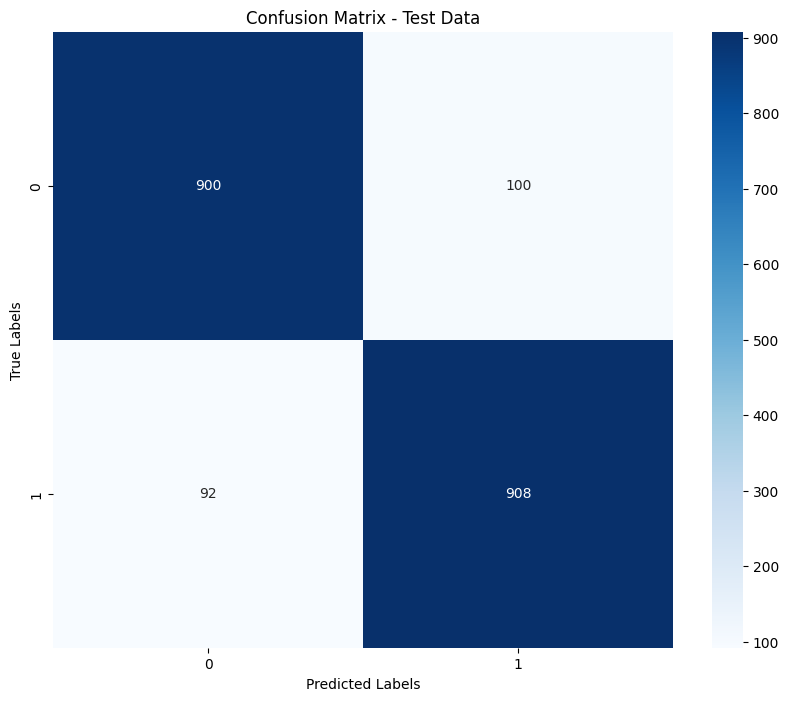

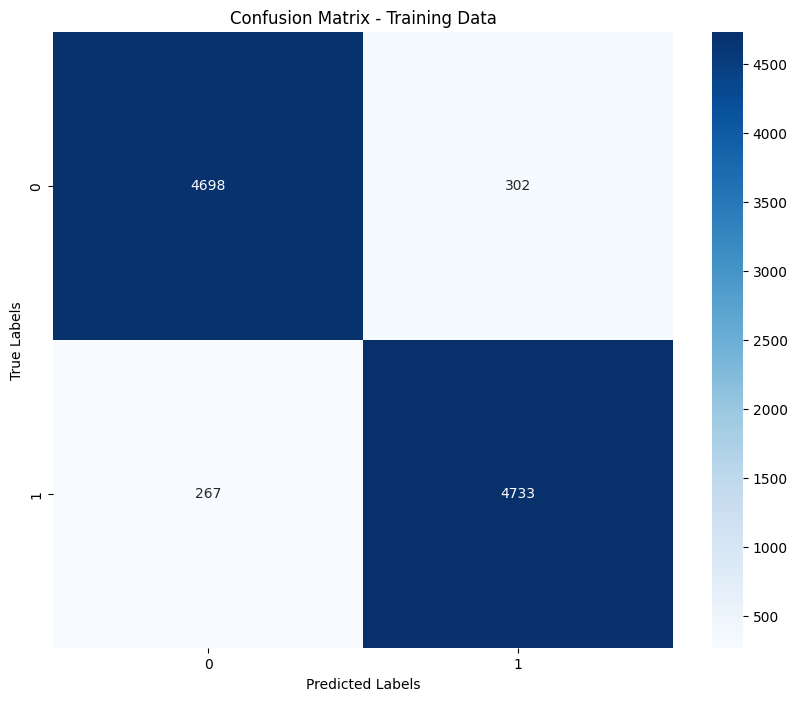

Unique labels in Y_train_subset: [0 1]
Unique labels in y_pred_train: [0 1]
Unique labels in Y_test_subset: [0 1]
Unique labels in y_pred_test: [0 1]


In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cm_test = confusion_matrix(y_test_subset, y_pred_test)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

cm_train = confusion_matrix(y_train_subset, y_pred_train)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("Unique labels in Y_train_subset:", np.unique(y_train_subset))
print("Unique labels in y_pred_train:", np.unique(y_pred_train))

print("Unique labels in Y_test_subset:", np.unique(y_test_subset))
print("Unique labels in y_pred_test:", np.unique(y_pred_test))

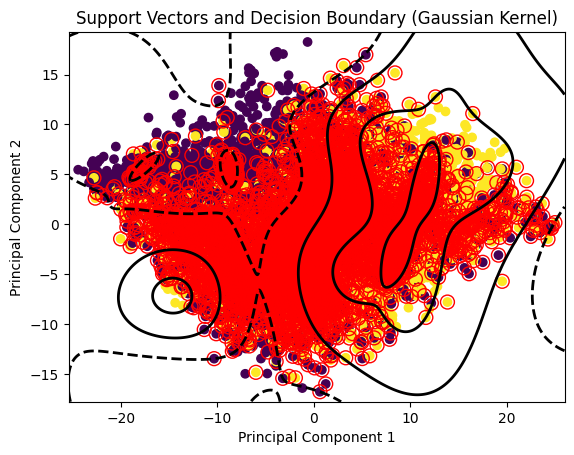

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# assuming x_train_flattened has more than two features
if x_train_flattened.shape[1] > 2:
    # apply PCA to reduce the data to 2D
    pca = PCA(n_components=2)
    x_train_pca = pca.fit_transform(x_train_flattened)

    # Create an instance of SVC with Gaussian (RBF) kernel
    rbf_model = SVC(kernel='rbf', C=2.0, gamma='scale')  # You can adjust the 'C' and 'gamma' parameters

    # Fit the model on the PCA-transformed data
    rbf_model.fit(x_train_pca, np.ravel(y_train_subset))

    # Plot the original data points in the reduced space
    plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train_subset, cmap='viridis')

    # Plot decision boundary
    h = .02
    x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
    y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Apply PCA to the meshgrid
    meshgrid_pca = np.c_[xx.ravel(), yy.ravel()]

    # Calculate decision function values for each point in the mesh
    Z = rbf_model.decision_function(meshgrid_pca)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linewidths=2, colors='black')

    # Highlight support vectors
    plt.scatter(rbf_model.support_vectors_[:, 0], rbf_model.support_vectors_[:, 1], facecolors='none', edgecolors='r', s=100)

    plt.title('Support Vectors and Decision Boundary (Gaussian Kernel)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()
else:
    print("Visualization only supported for datasets with more than two features.")
